In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv("cleaned_output.csv")
df

,encounter_id,dialogue,clean_dialogue
0,[doctor],"hi, martha . how are you ?","hi, martha . how are you ?"
1,[patient],i'm um doing okay . how are you ?,i am doing okay . how are you ?
2,[patient],okay .,okay .
3,[doctor],martha is a 50-year-old female with a past med...,martha is a 50-year-old female with a past med...
4,[patient],i'm doing well . i've been traveling a lot rec...,i am doing . i have been traveling a lot rece...
5,[doctor],nice . that's great . i'm glad to hear that yo...,nice . that's great . i am glad to hear that y...
6,[patient],"yes , fall foliage is the best .","yes , fall foliage is the best ."


In [4]:
from encoder import sbert_encoder

In [5]:
sentences = df["clean_dialogue"]

In [6]:
sentences

0                           hi, martha . how are you ?
1                     i am  doing okay . how are you ?
2                                               okay .
3    martha is a 50-year-old female with a past med...
4    i am doing  . i have been traveling a lot rece...
5    nice . that's great . i am glad to hear that y...
6                     yes , fall foliage is the best .
Name: clean_dialogue, dtype: object

In [7]:
s = sbert_encoder(list(sentences))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [11]:
s

tensor([[ 0.0007,  0.0050,  0.0463,  ..., -0.0058, -0.0588, -0.0091],
        [ 0.0408, -0.0213,  0.0880,  ..., -0.0218, -0.0477, -0.0120],
        [-0.0672, -0.0489, -0.0638,  ...,  0.0107,  0.0630,  0.0226],
        ...,
        [ 0.0685, -0.0107,  0.0607,  ..., -0.0976, -0.1115, -0.0232],
        [ 0.0327, -0.0562,  0.1385,  ..., -0.0290, -0.1636,  0.0963],
        [ 0.0322,  0.0175,  0.0756,  ..., -0.0974,  0.0419,  0.1103]])

In [58]:
def _L2_norm(array): 
      """
      Input:
      array -- np.ndarray: array of data
      Hypothesis: L2 norm

      ---------------------------
      Ouput:
      res -- int: L2 norm of `array`
      """
      return np.sqrt(np.sum(abs(array)**2))

In [10]:
def _normalization(df) : 
    """
    Input:
    df -- pd.DataFrame: input data to normalize

    ---------------------------
    Ouput:
    df_normalized -- pd.DataFrame: normalized dataframe
    """
    # define matrix
    mat = []

    # iteration
    for i in range(len(s)): 
      min_val = s[i].min()
      max_val = s[i].max()

      mat.append((s[0] - min_val) / (max_val - min_val))
    
    return np.array(mat)

In [12]:
_normalization(s)

array([[0.4218373 , 0.43611857, 0.57452637, ..., 0.39991266, 0.22208741,
        0.3888346 ],
       [0.47634953, 0.49259862, 0.6500773 , ..., 0.45140395, 0.24907652,
        0.43879947],
       [0.48069897, 0.4952738 , 0.63652617, ..., 0.45832375, 0.2768438 ,
        0.44701803],
       ...,
       [0.49362743, 0.50898147, 0.65778583, ..., 0.4700559 , 0.27887326,
        0.45814574],
       [0.5414827 , 0.55551445, 0.69150406, ..., 0.5199411 , 0.34522268,
        0.5090566 ],
       [0.54303604, 0.55720615, 0.6945367 , ..., 0.521282  , 0.34484082,
        0.5102902 ]], dtype=float32)

In [45]:
s1 = np.array(s[1])

In [46]:
np.sqrt(np.sum(s1**2))

1.0

In [49]:
s1

array([ 4.08028774e-02, -2.13074852e-02,  8.80460665e-02,  2.53384504e-02,
        1.39167923e-02, -4.40274738e-02,  2.26458404e-02, -2.00595781e-02,
       -7.57875666e-02,  8.55630264e-03, -4.06589881e-02,  3.16881835e-02,
       -3.67900096e-02,  1.23269549e-02, -2.11269185e-02,  1.39302956e-02,
        1.15633290e-02, -1.05967000e-01, -1.22093715e-01,  9.27277282e-02,
       -4.13894579e-02,  4.64753844e-02,  5.94385862e-02,  6.55205101e-02,
       -7.94472322e-02,  4.83352728e-02, -4.11492512e-02, -2.90736407e-02,
        5.25251850e-02, -6.47453666e-02, -1.09881699e-01, -4.26362455e-02,
       -4.00191871e-03, -2.45451219e-02, -3.81387100e-02,  2.14359928e-02,
        1.32845074e-03, -1.19451337e-01,  4.00918387e-02, -4.08803811e-03,
        3.05470880e-02, -1.01599225e-03, -2.66055781e-02, -3.01716197e-02,
        8.07374120e-02, -5.51033616e-02,  1.08014261e-02,  3.73430438e-02,
        8.99440199e-02, -3.13004665e-02, -6.73901960e-02,  5.51960208e-02,
       -5.69284968e-02,  

In [48]:
np.sqrt(sum(abs(s1)))

3.982726491987576

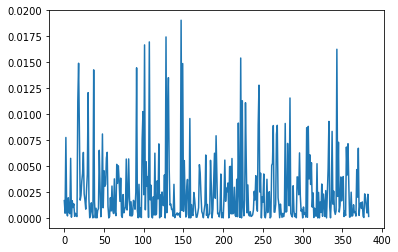

In [51]:
import matplotlib.pyplot as plt 

plt.plot(range(len(s1)),s1**2)

In [59]:
sample = [_L2_norm(np.array(s[i])) for i in range(len(s))]

In [61]:
np.dot(np.array(s[0]),np.array(s[1]))

0.61377245

In [60]:
np.std(sample)

2.2528438e-08

In [63]:
mat1 = np.zeros((len(s),len(s)))

for i in range(len(s)) : 
  for j in range(len(s)) : 
    if i==j : 
      mat1[i][j] = 1
    else : 
      mat1[i][j] = np.dot(np.array(s[i]), np.array(s[j])) / (_L2_norm(np.array(s[i])) * _L2_norm(np.array(s[j])))

In [67]:
mat1

array([[1.        , 0.61377245, 0.21085162, 0.63711226, 0.20166352,
        0.29430917, 0.10917674],
       [0.61377245, 1.        , 0.23645507, 0.50959444, 0.29244134,
        0.36707094, 0.00435824],
       [0.21085162, 0.23645507, 1.        , 0.1019907 , 0.07596648,
        0.04946779, 0.02988741],
       [0.63711226, 0.50959444, 0.1019907 , 1.        , 0.24868998,
        0.30907267, 0.02952325],
       [0.20166352, 0.29244134, 0.07596648, 0.24868998, 1.        ,
        0.4185921 , 0.27511448],
       [0.29430917, 0.36707094, 0.04946779, 0.30907267, 0.4185921 ,
        1.        , 0.33466303],
       [0.10917674, 0.00435824, 0.02988741, 0.02952325, 0.27511448,
        0.33466303, 1.        ]])